
### **Data Science / Data Visualization Practical**  


---

In this notebook, we will:
1. Load and understand the Indian food dataset.  
2. Explore the data using visualizations.  
3. Tell a **story** about Indian cuisine using charts and insights.


In [25]:
# ---- STEP 1: Import libraries & load the dataset ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_theme()

# Load Indian food dataset
df = pd.read_csv("indian_food.csv")

print("Shape of dataset (rows, columns):", df.shape)
df.head()

Shape of dataset (rows, columns): (255, 9)


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [26]:
# ---- STEP 2: Quick data overview ----
print("Column information:\n")
print(df.info())

print("\nMissing values in each column:\n")
print(df.isna().sum())

print("\nNumber of unique dishes:", df['name'].nunique())
print("Number of states covered:", df['state'].nunique())
print("Regions of India covered:", df['region'].unique())

Column information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB
None

Missing values in each column:

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

Number of unique dishes: 255
Number of states covered: 25
Regions of India covered: ['East' 'West' 'North' '

### Understanding the Dataset – Who are the main characters in our story?  

In this dataset, each **row** is like a character in a food story – a unique **Indian dish**.  
Each column tells us something about that dish:

- `name` – Name of the dish (our main character )  
- `ingredients` – What goes into the dish (the supporting cast )
- `diet` – Whether it is **vegetarian** or **non-vegetarian**  
- `prep_time` – How long it takes to prepare the dish (chopping, mixing, marinating etc.)  
- `cook_time` – How long it takes to cook  
- `flavor_profile` – Is it **spicy, sweet, bitter, sour** etc.?  
- `course` – Is it a **snack, main course, dessert, side dish** etc.?  
- `state` – Which Indian state it belongs to  
- `region` – North / South / East / West / Northeast / Central  

We’ll now start exploring this data visually and build a story around **how India eats** 🍽️.


In [27]:
# ---- STEP 3: Numerical summary (prep & cook time) ----
numeric_cols = ['prep_time', 'cook_time']
df[numeric_cols].describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


**Story behind this plot:**  

Here we see which dishes are **quick to prepare and cook** and which ones demand more **time and patience**.  

- Dishes in the **bottom-left corner** are *fast prep & fast cook* – perfect for busy college students.  
- Dishes towards the **top-right** are *slow prep & slow cook* – these are your **festival / family gathering** type meals.  
- Comparing different **flavor profiles**, we can ask:
  - Are **sweet** dishes faster or slower to make than **spicy** ones?  
  - Do **vegetarian** dishes generally take less time than **non-vegetarian** ones?  


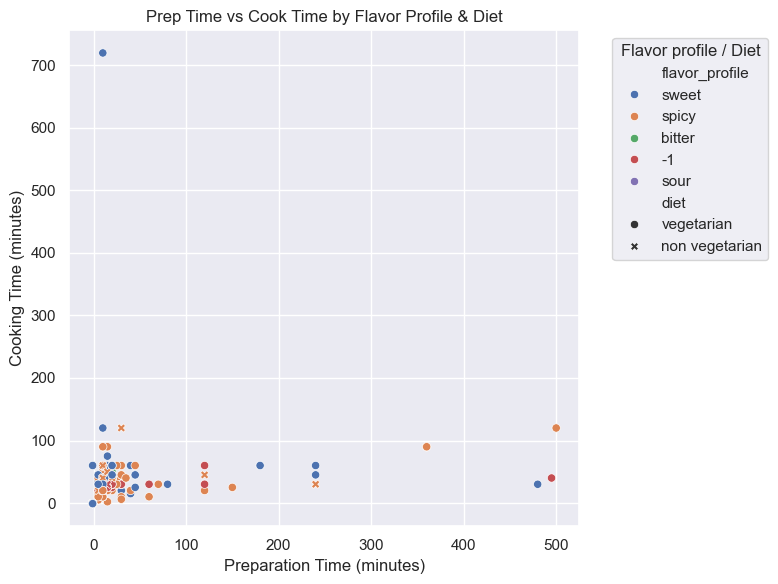

In [28]:
# ---- STEP 4: Scatter Plot - Prep Time vs Cook Time by Flavor Profile ----
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='prep_time',
    y='cook_time',
    hue='flavor_profile',
    style='diet'
)
plt.title("Prep Time vs Cook Time by Flavor Profile & Diet")
plt.xlabel("Preparation Time (minutes)")
plt.ylabel("Cooking Time (minutes)")
plt.legend(title="Flavor profile / Diet", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Story behind this plot:**  

This chart tells us **which part of India is the most time-demanding in the kitchen** 

- Regions with higher average total time might have dishes that are **richer, layered and more elaborate**.  
- Regions with lower cooking time may rely more on **quick stir-fries, snacks or simple meals**.  

Think of someone planning to cook a full thali from each region – this plot hints at **where they’ll spend the most time in the kitchen**.


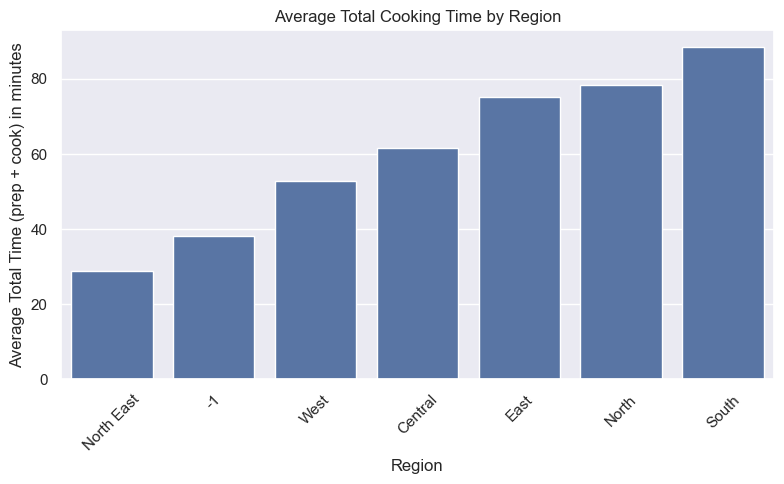

In [29]:
# ---- STEP 5: Bar Plot - Average Total Time by Region ----
df['total_time'] = df['prep_time'] + df['cook_time']

region_time = df.groupby('region')['total_time'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=region_time.index, y=region_time.values)
plt.title("Average Total Cooking Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Total Time (prep + cook) in minutes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Story behind this plot:**  

India is known as a **vegetarian-friendly country**, but that doesn’t mean non-veg is rare.  
This simple chart shows the **balance between veg and non-veg dishes** in our dataset.

- If vegetarian bars are much taller: our dataset reflects **strong veg dominance**.  
- If non-veg is close: it tells a story of **diverse eating habits** across the country.


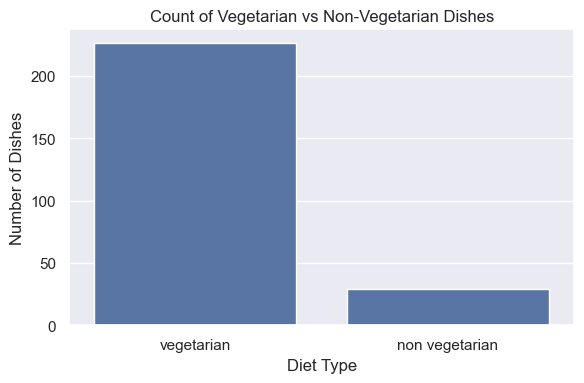

In [30]:
# ---- STEP 6: Count Plot - Vegetarian vs Non-Vegetarian ----
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diet')
plt.title("Count of Vegetarian vs Non-Vegetarian Dishes")
plt.xlabel("Diet Type")
plt.ylabel("Number of Dishes")
plt.tight_layout()
plt.show()

**Story behind this plot:**  

This is where the **personality of Indian food** appears 

- Are most dishes **spicy**? That would match the stereotype.  
- Do we have many **sweet** desserts?  
- How many dishes are **sour, bitter or other profiles**?  

This chart answers: *“What mood does Indian food usually have?”*


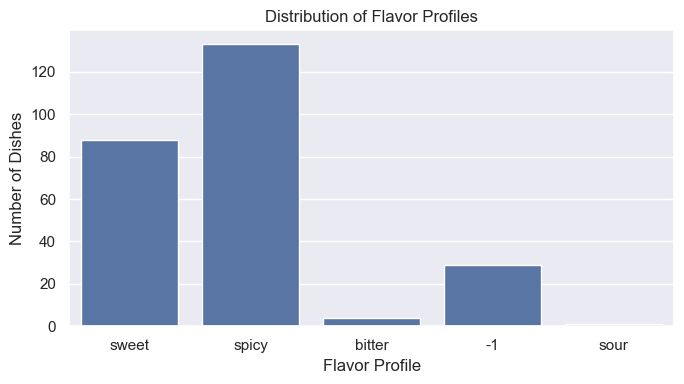

In [31]:
# ---- STEP 7: Count Plot - Flavor Profiles ----
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='flavor_profile')
plt.title("Distribution of Flavor Profiles")
plt.xlabel("Flavor Profile")
plt.ylabel("Number of Dishes")
plt.tight_layout()
plt.show()

**Story behind this plot:**  

This heatmap shows **which types of dishes (snacks, desserts, main course, etc.) are popular in which regions**.

- Darker cells = more dishes of that type in that region.  
- For example, if **desserts** are heavily concentrated in one region, it may hint at a strong **mithai culture**.  
- If **snacks** dominate in another region, we might think of **street food culture** there.


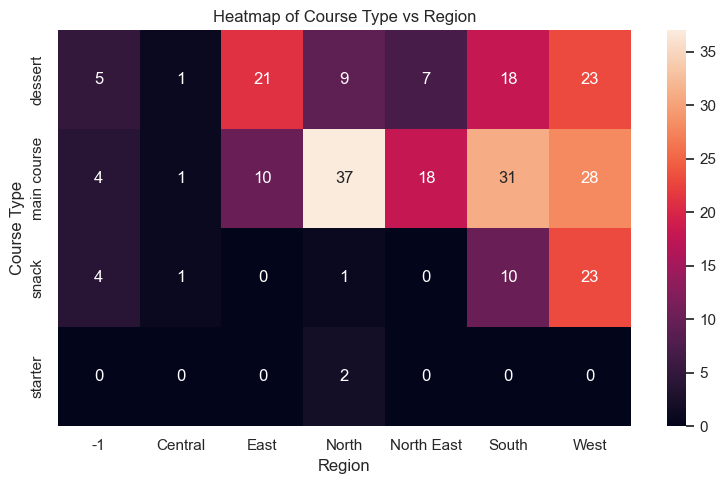

In [32]:
# ---- STEP 8: Heatmap - Course vs Region ----
course_region = pd.crosstab(df['course'], df['region'])

plt.figure(figsize=(8, 5))
sns.heatmap(course_region, annot=True, fmt='d')
plt.title("Heatmap of Course Type vs Region")
plt.xlabel("Region")
plt.ylabel("Course Type")
plt.tight_layout()
plt.show()

**Story behind these plots:**  

These two charts answer questions like:

- Are most dishes **quick to prepare**, or do they need a lot of chopping & marinating?  
- Do many dishes take **very long to cook**, or are they mostly **medium range**?  
- Are there **outliers** – very long cooking or preparation times? Those could be **special festival dishes**.


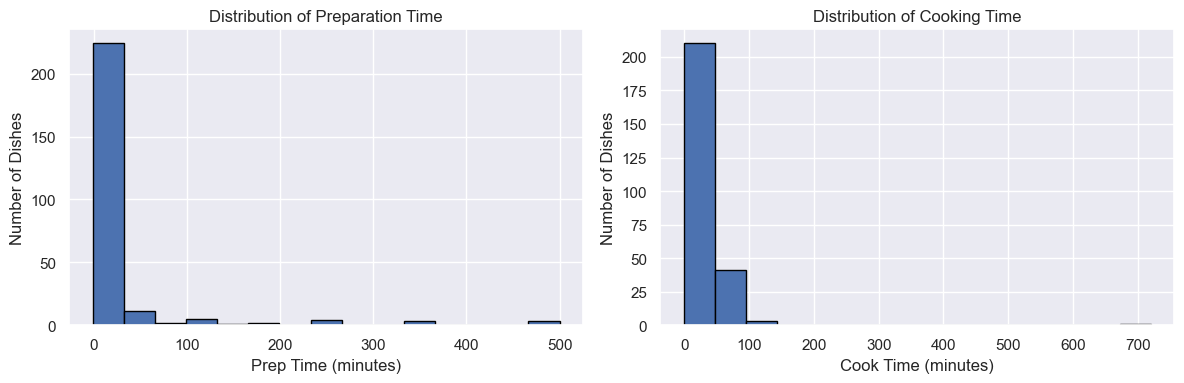

In [33]:
# ---- STEP 9: Histograms - Distribution of Prep & Cook Time ----
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['prep_time'], bins=15, edgecolor='black')
plt.title("Distribution of Preparation Time")
plt.xlabel("Prep Time (minutes)")
plt.ylabel("Number of Dishes")

plt.subplot(1, 2, 2)
plt.hist(df['cook_time'], bins=15, edgecolor='black')
plt.title("Distribution of Cooking Time")
plt.xlabel("Cook Time (minutes)")
plt.ylabel("Number of Dishes")

plt.tight_layout()
plt.show()

**Story behind this pie:**  

This pie chart shows **how our dataset is balanced across different meal courses**:

- If **snacks** dominate → our data focuses more on **fast, fun, light eating**.  
- If **main course** dominates → it’s more about **full meals**.  
- A big slice for **dessert** means we’re exploring **India’s sweet tooth** 🍮.


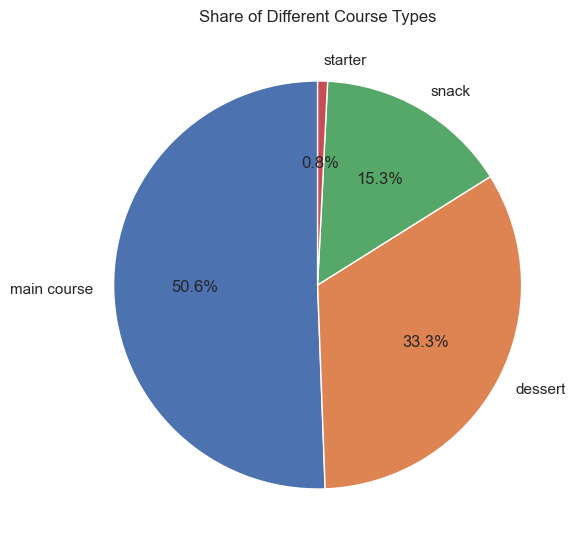

In [34]:
# ---- STEP 10: Pie Chart - Course Type Share ----
course_counts = df['course'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(course_counts, labels=course_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Share of Different Course Types")
plt.tight_layout()
plt.show()

**Story behind this plot:**  

This chart shows the **states that contribute the most dishes** to our dataset.

- States at the top are **food heroes** in our data – they are represented the most.  
- This doesn’t mean other states don’t have good food – it just means our **dataset** has more entries for these states.  
- It also hints at where **food bloggers and data collectors** may have focused more.


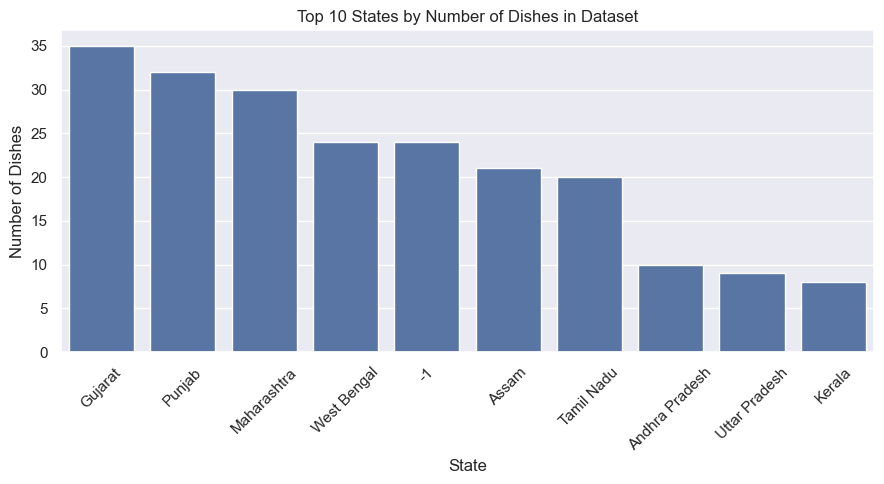

In [35]:
# ---- STEP 11: Top 10 States by Number of Dishes ----
state_counts = df['state'].value_counts().head(10)

plt.figure(figsize=(9, 5))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title("Top 10 States by Number of Dishes in Dataset")
plt.xlabel("State")
plt.ylabel("Number of Dishes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Story behind this line plot**

This line chart tells the story of **how much time different regions of India spend in the kitchen** (on average) for their dishes.

- Regions that are **higher on the line** have dishes that usually take **more total time** (prep + cook). These might represent **elaborate thalis, slow-cooked curries, or layered recipes**.
- Regions that are **lower on the line** have dishes that are **quicker to make**, which could indicate more **snack-based, street-food style, or simple everyday recipes**.
- Because the regions are sorted by average time, the **shape of the line** shows us whether the increase is gradual or if there are **one or two regions that stand out** with very time-consuming dishes.

Overall, this plot answers:  
*“Which part of India makes us work the hardest in the kitchen according to this dataset?”*


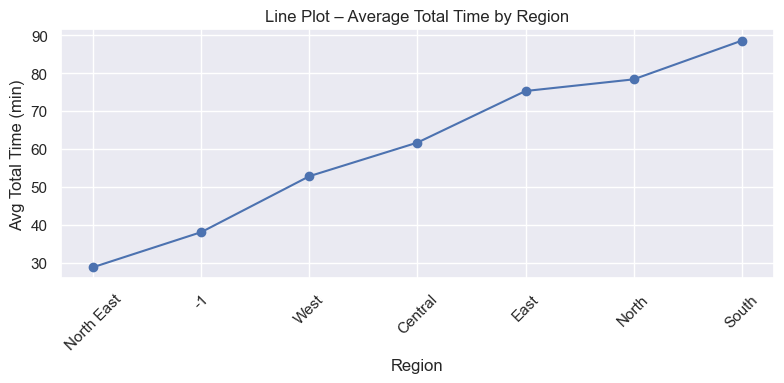

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'total_time' not in df.columns:
    df['total_time'] = df['prep_time'] + df['cook_time']

region_time = df.groupby('region')['total_time'].mean().sort_values()

plt.figure(figsize=(8,4))
plt.plot(region_time.index, region_time.values, marker='o')
plt.title('Line Plot – Average Total Time by Region')
plt.xlabel('Region')
plt.ylabel('Avg Total Time (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Story behind this bar chart**

This bar chart shows the **personality of Indian food** in our dataset, based on its **flavor profiles**.

- Each bar represents a **flavor category** like *spicy, sweet, bitter, sour,* etc., and its height shows **how many dishes** belong to that taste.
- A **tall bar for “spicy”** confirms the popular belief that Indian food loves heat 🌶️.
- A strong count for **“sweet”** suggests that desserts and mithai are also well represented.
- If some flavors have **very small bars** or are even missing, it tells us that those **flavor types are rare** in this dataset.

This chart answers:  
*“Is Indian food in this dataset mostly spicy, mostly sweet, or a balanced mix?”*


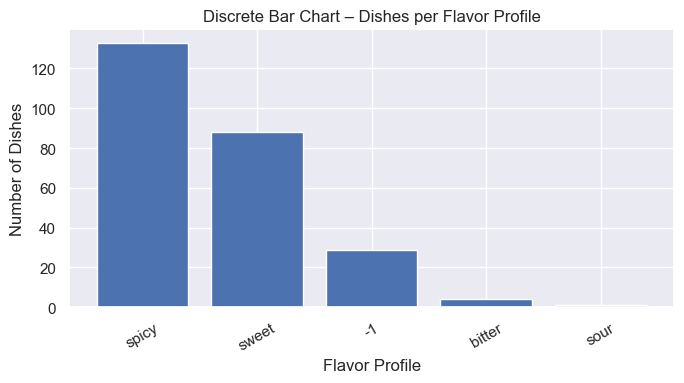

In [37]:
flavor_counts = df['flavor_profile'].value_counts()

plt.figure(figsize=(7,4))
plt.bar(flavor_counts.index, flavor_counts.values)
plt.title('Discrete Bar Chart – Dishes per Flavor Profile')
plt.xlabel('Flavor Profile')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Story behind this exploded pie chart**

This exploded pie chart shows how the dataset is **divided across different meal types** (course), like **snacks, main courses, desserts, side dishes**, etc.

- The **pulled-out (exploded) slice** is the **most common course type**. This highlights **what kind of dish dominates** our dataset.
- If **snacks** are the biggest slice, the dataset is more focused on **quick bites and street-style food**.
- If **main course** dominates, then the focus is more on **full meals**.
- A big **dessert slice** means the dataset is celebrating **India’s sweet side** 🍨.

So this chart answers:  
*“In this food story, are we mostly snacking, dining, or eating desserts?”*


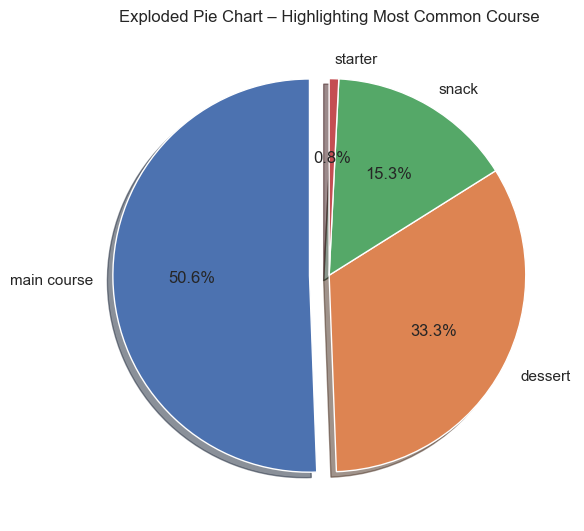

In [38]:
course_counts = df['course'].value_counts()
labels = course_counts.index
sizes = course_counts.values
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
plt.title('Exploded Pie Chart – Highlighting Most Common Course')
plt.tight_layout()
plt.show()

**Story behind this distribution plot**

This distribution plot shows **how preparation time is spread** across all dishes.

- The **shape of the bars** (histogram) tells us whether **most dishes are quick to prepare** or whether many require **long chopping, marinating, and mixing time**.
- The **KDE curve** (smooth line) helps us see where the **peak** is.  
  - If the peak is near low prep times → many dishes are **fast to prep**.  
  - If it’s towards higher values → many dishes require **serious prep work**.
- Any **long tail** on the right side represents **few special dishes** that take a **very long time** to get ready—these could be **festival, feast, or traditional dishes**.

This plot answers:  
*“How much patience do we need before these dishes even reach the stove?”*


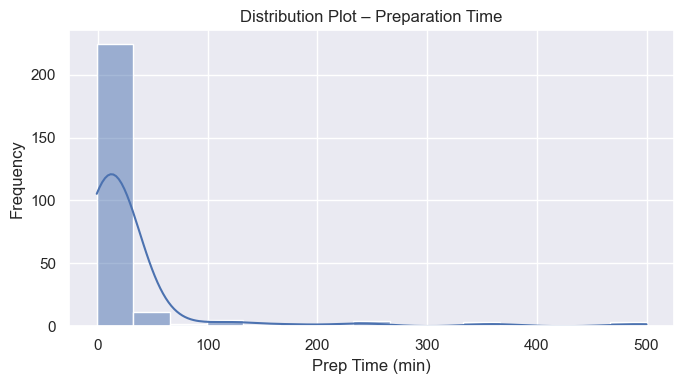

In [39]:
plt.figure(figsize=(7,4))
sns.histplot(df['prep_time'], bins=15, kde=True)
plt.title('Distribution Plot – Preparation Time')
plt.xlabel('Prep Time (min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Story behind this box plot**

This box plot compares **cooking time for vegetarian and non-vegetarian dishes**.

- For each diet type (veg / non-veg), we see:
  - The **median** (middle line in the box) → typical cook time.
  - The **box height** → spread of most dishes (from 25th to 75th percentile).
  - The **whiskers and dots** → dishes that cook **much faster or much slower** than usual (outliers).
- If **non-veg dishes** have a higher median or longer whiskers, it suggests they often need **more time to cook** (e.g., meat-based dishes).
- If **veg dishes** show a tighter, smaller box, it means they are **more consistent and predictable** in cooking time.

This plot answers:  
*“Do vegetarian dishes really take less time, or is that just a myth?”*


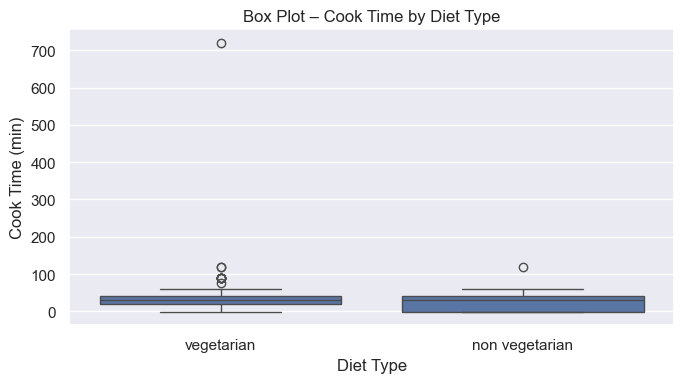

In [40]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='diet', y='cook_time')
plt.title('Box Plot – Cook Time by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Cook Time (min)')
plt.tight_layout()
plt.show()

**Story behind this violin plot**

This violin plot shows the **full distribution of total cooking time** (prep + cook) for each **region**.

- The **width** of the violin at any point shows **how many dishes** fall near that time.
  - **Wide parts** mean many dishes with that total time.
  - **Narrow parts** mean fewer dishes around that time.
- You can compare:
  - Which region has **more quick dishes**, visible as a wider shape near **lower times**.
  - Which region has more **long-time dishes**, showing wider sections towards **higher times**.
- Some regions might show **two bulges**, indicating **two popular time ranges** (e.g., many quick dishes AND many long-festival dishes).

This plot answers:  
*“How does the time spent cooking vary across different regions of India?”*


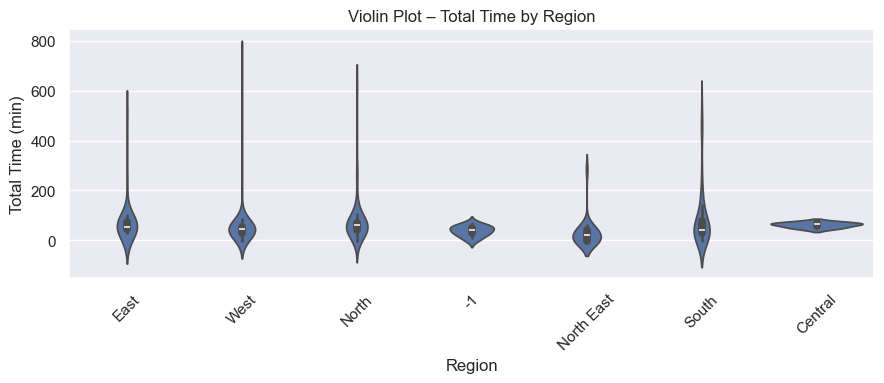

In [41]:
if 'total_time' not in df.columns:
    df['total_time'] = df['prep_time'] + df['cook_time']

plt.figure(figsize=(9,4))
sns.violinplot(data=df, x='region', y='total_time')
plt.title('Violin Plot – Total Time by Region')
plt.xlabel('Region')
plt.ylabel('Total Time (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Story behind this KDE / density plot**

This KDE plot gives a **smooth view of how cooking times are distributed**.

- Peaks in the curve show **popular cooking durations**:
  - A peak at **low times** means many dishes are **fast to cook**.
  - A peak at **medium or higher times** suggests many dishes need **steady cooking**.
- The **spread** of the curve shows how **varied** the cooking times are:
  - A narrow, tall curve → most dishes have **similar cooking times**.
  - A wide, flat curve → cooking times are **spread over many ranges**.

This plot answers:  
 *“Are most dishes fast, medium, or slow to cook according to this dataset?”*


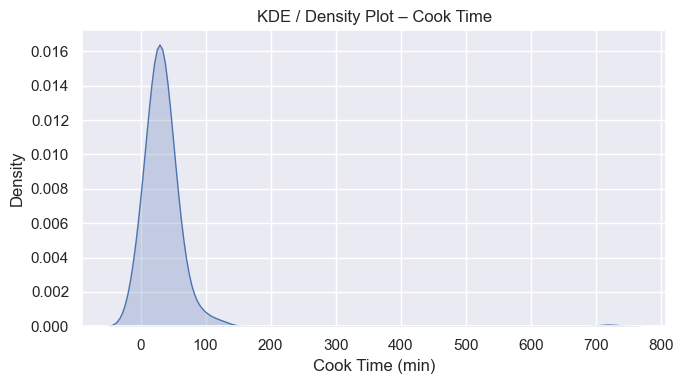

In [42]:
plt.figure(figsize=(7,4))
sns.kdeplot(df['cook_time'], fill=True)
plt.title('KDE / Density Plot – Cook Time')
plt.xlabel('Cook Time (min)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

**Story behind this KDE comparison plot**

Here we compare the **cooking time distribution of vegetarian vs non-vegetarian dishes** on the same graph.

- Each curve represents a **diet type**, showing how their cooking times are spread.
- If the **non-veg curve is shifted to the right**, it means **non-veg dishes generally take longer** to cook.
- If the **veg curve is taller around lower cook times**, it means many veg dishes are **fast and convenient**.
- Where the curves **overlap**, both veg and non-veg dishes share **similar typical cooking times**.

This plot answers:  
*“How do cooking time patterns differ between veg and non-veg dishes?”*


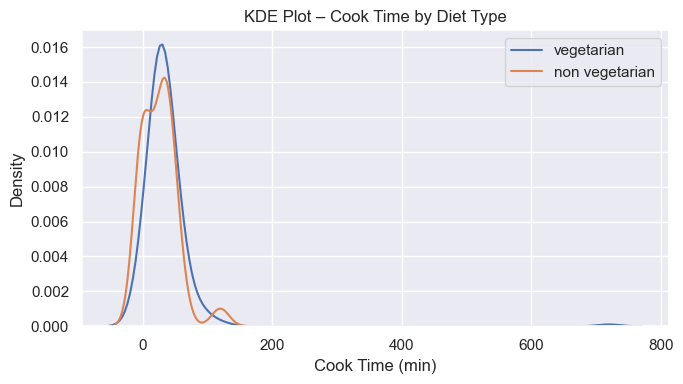

In [43]:
plt.figure(figsize=(7,4))
for d_type in df['diet'].dropna().unique():
    sns.kdeplot(df[df['diet'] == d_type]['cook_time'], label=d_type, fill=False)
plt.title('KDE Plot – Cook Time by Diet Type')
plt.xlabel('Cook Time (min)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

**Story behind this sparkline**

This tiny sparkline shows the **trend of total cooking time** for the **first 30 dishes** in the dataset.

- Each point represents one dish; the line quickly shows **ups and downs** in total time.
- **Sudden spikes** represent dishes that take **much longer** than the ones around them.
- **Flat or gently rising sections** show a sequence of dishes with **similar or gradually changing total times**.
- Because there are **no axes or labels**, this sparkline is not for exact values—it’s meant to give a **quick visual feel** of the variation.

This mini-plot answers:  
*“At a glance, do our first 30 dishes jump wildly in time, or are they fairly consistent?”*


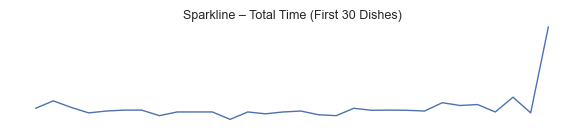

In [44]:
if 'total_time' not in df.columns:
    df['total_time'] = df['prep_time'] + df['cook_time']

subset = df['total_time'].head(30).reset_index(drop=True)
plt.figure(figsize=(6,1.5))
plt.plot(subset, linewidth=1)
plt.axis('off')
plt.title('Sparkline – Total Time (First 30 Dishes)', fontsize=9, pad=2)
plt.tight_layout()
plt.show()

In [45]:
# ---- STEP 12: DATA STORY & KEY INSIGHTS ----

print("===== DATA STORY & KEY INSIGHTS ON INDIAN FOOD =====\n")

# Overall variety
num_dishes = df['name'].nunique()
num_states = df['state'].nunique()
num_regions = df['region'].nunique()
print(f"1) Diversity of Dishes:")
print(f"   Our dataset contains {num_dishes} unique dishes from {num_states} states across {num_regions} regions of India.")
print("   This means we are not just looking at one city's menu – we’re exploring a mini food map of India.\n")

# Diet balance
diet_counts = df['diet'].value_counts()
print("2) Diet Preference:")
for diet_type, count in diet_counts.items():
    print(f"   • {diet_type}: {count} dishes")
print("   This tells us how strongly the dataset leans towards vegetarian vs non-vegetarian food.\n")

# Flavor profile
flavor_counts = df['flavor_profile'].value_counts()
print("3) Flavor Personality of Indian Food:")
for flavor, count in flavor_counts.items():
    print(f"   • {flavor}: {count} dishes")
print("   This gives a sense of whether Indian food in this dataset is mostly spicy, sweet, or something else.\n")

# Time insight
avg_prep = df['prep_time'].mean()
avg_cook = df['cook_time'].mean()
print("4) Time in the Kitchen:")
print(f"   On average, dishes take about {avg_prep:.1f} minutes to prepare and {avg_cook:.1f} minutes to cook.")
print("   Some dishes are perfect for a quick college dinner, while others are best saved for weekends or festivals.\n")

# Region & course
print("5) Regions & Courses:")
print("   By looking at course vs region and top states, we see which areas shine in snacks, desserts, or main courses.")
print("   This tells a story of local food culture – where street food thrives, where sweets dominate, and where full meals rule.\n")

print("===== FINAL TAKEAWAY =====")
print("Indian food is not just about 'spicy curry'. It is a combination of time, tradition, region, and taste.")
print("Using just a CSV file and a few visualizations, we turned raw data into a story about how India eats. :)")

===== DATA STORY & KEY INSIGHTS ON INDIAN FOOD =====

1) Diversity of Dishes:
   Our dataset contains 255 unique dishes from 25 states across 7 regions of India.
   This means we are not just looking at one city's menu – we’re exploring a mini food map of India.

2) Diet Preference:
   • vegetarian: 226 dishes
   • non vegetarian: 29 dishes
   This tells us how strongly the dataset leans towards vegetarian vs non-vegetarian food.

3) Flavor Personality of Indian Food:
   • spicy: 133 dishes
   • sweet: 88 dishes
   • -1: 29 dishes
   • bitter: 4 dishes
   • sour: 1 dishes
   This gives a sense of whether Indian food in this dataset is mostly spicy, sweet, or something else.

4) Time in the Kitchen:
   On average, dishes take about 31.1 minutes to prepare and 34.5 minutes to cook.
   Some dishes are perfect for a quick college dinner, while others are best saved for weekends or festivals.

5) Regions & Courses:
   By looking at course vs region and top states, we see which areas shine i